# Ontology Search

This program will load and explore the Cell Ontology from https://www.ebi.ac.uk/ols/ontologies/cl

From the above site, you can download the ontology file as *cl.owl*.

The leafs in the ontology file contain information from the following:

- BFO: Basic Formal Ontology 
- CARO: Common Anatomy Reference Ontology
- CHEBI: Chemical Entities of Biological Interest
- CL: Cell Ontology
- CP: unclear meaning
- http: start of website, inclusion is unclear
- GO: Gene Ontology
- NCBITaxon: ncbitaxon
- PATO: Phenotype and Trait Ontology
- PR: Protein Ontology
- RO: Relations Ontology
- UBERON: Uber-anatomy ontology



To acess the ontology, we will use *pronto*, which can be installed with *pip*. Some resources:

- From https://github.com/althonos/pronto
- DOI: https://doi.org/10.5281/zenodo.595572
- PDF of release notes: https://pronto.readthedocs.io/_/downloads/en/latest/pdf/

In [1]:
from pronto import Ontology

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import json
import urllib.request

import pandas as pd

plt.style.use('seaborn-white')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=9,
    linewidth=4
    )


%matplotlib inline



/var/folders/gy/qftxzz157cz4xv36kyp3yp59ztxvbq/T/ipykernel_27220/1221761783.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
cl = Ontology.from_obo_library('cl.owl')

/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:289: SyntaxWarning: <Element '{http://purl.org/dc/elements/1.1/}description' at 0x7fdad91c03b0> contains text but no `xsd:datatype`
  meta.annotations.add(self._extract_literal_pv(child))
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:289: SyntaxWarning: <Element '{http://purl.org/dc/elements/1.1/}title' at 0x7fdad91c02c0> contains text but no `xsd:datatype`
  meta.annotations.add(self._extract_literal_pv(child))
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:289: SyntaxWarning: <Element '{http://www.w3.org/2002/07/owl#}versionInfo' at 0x7fdad91bc770> contains text but no `xsd:datatype`
  meta.annotations.add(self._extract_literal_pv(child))
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:113: SyntaxWarning: unknown elem

/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:117: SyntaxWarning: unknown element in `owl:Class`: {http://purl.obolibrary.org/obo/}RO_0004050
  self._extract_term(class_, curies)
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:117: SyntaxWarning: unknown element in `owl:Class`: {http://purl.org/dc/terms/}contributor
  self._extract_term(class_, curies)
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:117: SyntaxWarning: unknown element in `owl:Class`: {http://xmlns.com/foaf/0.1/}depiction
  self._extract_term(class_, curies)
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/parsers/rdfxml.py:117: SyntaxWarning: unknown element in `owl:Class`: {http://purl.obolibrary.org/obo/}IAO_0000028
  self._extract_term(class_, curies)
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/si

/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/ontology.py:283: SyntaxWarning: unknown axiom property: 'http://www.w3.org/2002/07/owl#disjointWith'
  cls(self).parse_from(_handle)  # type: ignore
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/ontology.py:283: SyntaxWarning: unknown axiom property: 'http://purl.obolibrary.org/obo/UBPROP_0000001'
  cls(self).parse_from(_handle)  # type: ignore
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/ontology.py:283: SyntaxWarning: unknown axiom property: 'http://purl.obolibrary.org/obo/UBPROP_0000003'
  cls(self).parse_from(_handle)  # type: ignore
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/python3.8/site-packages/pronto/ontology.py:283: SyntaxWarning: unknown axiom property: 'http://purl.obolibrary.org/obo/UBPROP_0000012'
  cls(self).parse_from(_handle)  # type: ignore
/Users/josh.fuchs/My Drive/Personal/michigan/venv/lib/p

In [3]:
cl

Ontology('http://purl.obolibrary.org/obo/cl.owl')

In [4]:
cl['CL:0002116']

Term('CL:0002116', name='B220-low CD38-positive unswitched memory B cell')

## Get tree structure

In [3]:
def find_parent(subclass, distance=1):
    '''
    Finds parent(s) of input subclass for current ontology, which must be loaded as cl. Parents will be 
    found within input distance of subclass. Immediate parents correspond with distance = 1. 
    
    Parameters
    ----------
    subclass : str
        string with full name of subclass you want to identify the parents of
        
    distance (optional): int
        distance from subclass you want to find parents of
        default = 1
        
    Returns
    -------
    parents : list
        list of parents for input subclass
    '''
    root_node = cl[subclass]
    parents = []
    for term in root_node.superclasses(distance=distance,with_self=False).to_set():
        parents.append(term.id)
    return parents

In [4]:
def find_children(supperclass, distance=1):
    '''
    Finds children of input subclass for current ontology, which must be loaded as cl. Children will be 
    found within input distance of subclass. Immediate children correspond with distance = 1. 
    
    Parameters
    ----------
    subclass : str
        string with full name of subclass you want to identify the children of
        
    distance (optional): int
        distance from subclass you want to find children of
        default = 1
        
    Returns
    -------
    parents : list
        list of children for input subclass
    '''
    root_node = cl[supperclass]
    children = []
    for term in root_node.subclasses(distance=distance,with_self=False).to_set():
        children.append(term.id)
    return children

In [5]:
def get_tree(root,tree_dict,parents_or_children,level=0,top_parent = 'CL:0000000'):
    '''
    Determines tree structure starting with a leaf and identifying all superclasses/parents
    
    Parameters
    ----------
    root : str
        string with full name of ID you want to identify the parents of
        
    tree_dict : dictionary
        dictionary with tree. keys are levels, where level=0 is the initial leaf.
        values are ontology IDs
        
    level (optional): int
        level of root to build tree dictionary
        default = 0
        
    top_parent : string
        top level of ontology you wish you classify to. Used only if you want to return a subset
        of the ontology
        default = 'CL:0000000' (Cell in the Cell Ontology)
        
    Returns
    -------
    tree_dict : dictionary
        dictionary of tree given inital root. 
        keys are levels, where level=0 is the initial leaf.
        values are ontology IDs
        There will be duplicates in the keys because of multiple inheritance
        Can run list(set(key)) to remove duplicates
    '''


    # add root to dictionary if level = 0
    # need to check if level in tree_dict in case
    # we are iterating over multiple leafs
    if level == 0:
        if level in tree_dict:
            tree_dict[level].append(root)
        else:
            tree_dict[level] = [root]
    
    # get parent ids
    if parents_or_children == 'parents':
        parents_of_id = find_parent(root)
    elif parents_or_children == 'children':
        parents_of_id = find_children(root)
    level += 1
    
    # add parents to dictionary
    if level in tree_dict:
        tree_dict[level] += parents_of_id
    else:
        tree_dict[level] = parents_of_id

    if top_parent in parents_of_id: #parents_of_id is None:
        pass
    else:
        for parent in parents_of_id:
            tree_dict = get_tree(parent,tree_dict,parents_or_children=parents_or_children,level=level,top_parent = top_parent)
    
    return tree_dict


In [11]:
tree_dict = {}
tree_dict = get_tree('CL:0000988',tree_dict,parents_or_children = 'children',level=0)

# tree dict will have duplicates
# so let's remove them now

for key, value in tree_dict.items():
     tree_dict[key] = list(set(value))
    
tree_dict

{0: ['CL:0000988'],
 1: ['CL:1001610', 'CL:0000738', 'CL:0008001', 'CL:0000763', 'CL:0000081'],
 2: ['CL:0002193',
  'CL:0000553',
  'CL:0000836',
  'CL:0002028',
  'CL:0000040',
  'CL:0002010',
  'CL:0000559',
  'CL:0010004',
  'CL:0000828',
  'CL:0001029',
  'CL:0000611',
  'CL:0002087',
  'CL:0002031',
  'CL:0000145',
  'CL:0000831',
  'CL:0000842',
  'CL:0002476',
  'CL:0000557',
  'CL:0000390',
  'CL:2000074',
  'CL:0000385',
  'CL:0000834',
  'CL:0002318',
  'CL:0000835',
  'CL:0000764',
  'CL:0000094',
  'CL:0000232',
  'CL:0000766',
  'CL:0002009',
  'CL:0000837',
  'CL:0000050',
  'CL:0000233',
  'CL:0002192',
  'CL:0000762',
  'CL:0000037',
  'CL:0000613',
  'CL:0000556',
  'CL:0002032',
  'CL:0011114'],
 3: ['CL:0000840',
  'CL:0000999',
  'CL:0002010',
  'CL:0002151',
  'CL:0000765',
  'CL:0000993',
  'CL:0000051',
  'CL:0001024',
  'CL:0000841',
  'CL:0000542',
  'CL:0000830',
  'CL:0002044',
  'CL:0000778',
  'CL:0002011',
  'CL:0000235',
  'CL:0000785',
  'CL:0002025',
 

In [12]:
# print the 

flipped = {}

for key, value in tree_dict.items():
    for x in value:
        if x not in flipped:
            flipped[x] = [key]
        else:
            flipped[x].append(key)
            
for key, value in flipped.items():
    if len(value) > 1:
        print(key, value)

CL:0002193 [2, 5]
CL:0000553 [2, 4]
CL:0000836 [2, 5]
CL:0002028 [2, 5]
CL:0000040 [2, 5]
CL:0002010 [2, 3]
CL:0000559 [2, 5]
CL:0010004 [2, 3]
CL:0000828 [2, 4]
CL:0001029 [2, 4]
CL:0000611 [2, 5]
CL:0000831 [2, 4]
CL:0002476 [2, 5]
CL:0000557 [2, 5]
CL:0000834 [2, 5]
CL:0000835 [2, 5]
CL:0000094 [2, 3]
CL:0000232 [2, 3]
CL:0002009 [2, 3]
CL:0000050 [2, 3]
CL:0002192 [2, 5]
CL:0000613 [2, 5]
CL:0011114 [2, 5, 6]
CL:0000840 [3, 5]
CL:0000999 [3, 6]
CL:0002151 [3, 6]
CL:0000993 [3, 6]
CL:0000841 [3, 5]
CL:0000830 [3, 6]
CL:0002044 [3, 6]
CL:0000778 [3, 4]
CL:0002011 [3, 4]
CL:0000785 [3, 7]
CL:0002025 [3, 5]
CL:0000614 [3, 5, 6]
CL:0002002 [3, 6]
CL:0002001 [3, 6]
CL:0002005 [3, 4]
CL:0000595 [3, 4]
CL:0000832 [3, 6]
CL:0000042 [3, 6]
CL:0001000 [3, 5]
CL:0002007 [3, 6]
CL:0002029 [3, 5]
CL:0000782 [3, 5]
CL:0000582 [3, 5, 6]
CL:0002008 [3, 6]
CL:0000829 [3, 6]
CL:0002024 [3, 5]
CL:0000562 [3, 4]
CL:0000612 [3, 5, 6]
CL:0000580 [3, 5, 6]
CL:0000833 [3, 6]
CL:0000769 [3, 5, 6]
CL:0000041

In [32]:
leafs = ['CL:0000900', 'CL:0000934', 'CL:0001044']

leafs_dict_test = {}

for x in leafs:
    leafs_dict_test = get_tree(x,leafs_dict_test,level=0)

# leafs_dict_test will have duplicates
# so let's remove them now

for key, value in leafs_dict_test.items():
    leafs_dict_test[key] = list(set(value))
        
leafs_dict_test

{0: ['CL:0001044', 'CL:0000900', 'CL:0000934'],
 1: ['CL:0000625', 'CL:0000911', 'CL:0000898', 'CL:0000624'],
 2: ['CL:0002419', 'CL:0000791'],
 3: ['CL:0000084', 'CL:0002419', 'CL:0000789', 'CARO:0000006', 'PR:000050567'],
 4: ['CL:0000542',
  'CL:0000084',
  'BFO:0000040',
  'CARO:0000000',
  'CARO:0000006',
  'PR:000050567'],
 5: ['CL:0000542',
  'CARO:0030000',
  'CL:0000842',
  'BFO:0000040',
  'BFO:0000004',
  'CARO:0000000'],
 6: ['CL:0000226',
  'CARO:0030000',
  'CL:0000738',
  'CL:0000842',
  'BFO:0000004',
  'BFO:0000002'],
 7: ['CL:0000219',
  'CL:0000226',
  'CL:0000738',
  'CL:0000988',
  'BFO:0000004',
  'CARO:0000000',
  'CL:0002242',
  'BFO:0000002'],
 8: ['CL:0000219',
  'CARO:0030000',
  'CL:0002371',
  'CL:0000988',
  'CL:0000003',
  'CL:0000548',
  'CARO:0000000',
  'CL:0002242',
  'BFO:0000002'],
 9: ['CARO:0030000',
  'CL:0002371',
  'CL:0000000',
  'CL:0000003',
  'CL:0000548',
  'BFO:0000004',
  'CL:0000255'],
 10: ['BFO:0000002', 'CL:0000000', 'CL:0000003', 'B

## Get Distance between nodes

In [12]:
# use get_tree to find 

def set_internal_node_relationships(internal_values,top_node,all_parent_nodes):
    '''
    Computes and returns a dictionary where each internal value is a key and the values are all Cell Ontology
    terms that are within the same distance from the top_node
    
    Relies upon get_tree and find_parents functions. 
    
    Assumes a CL object is already open. 
    
    Parameters
    ----------
    internal_values : list
        list of internal values that are included in the dataset
        
    top_node : string
        Cell Ontology Term ID that is the top of the tree to be considered
    
    all_parent_nodes : list
        from the dataset, a list of parent nodes in the ontology. Used to remove portions of
        the Ontology where we do not have child data
    
    Returns
    ----------
    parent_dict : dictionary
        keys are internal_values and values are all cell ontology terms within the same distance
        from the top node. 
    '''
    
    parents_or_children = 'parents'
    parent_dict = {}

    for internal_node in internal_values:

        internal_tree = {}

        # use the get_tree function to get the tree structure from this node to the top
        tree_up = get_tree(internal_node,internal_tree,parents_or_children = parents_or_children,level=0,top_parent = top_node)
        # loop through the values, and return the key the corresponds to the first
        # instance of the top node
        # because of multiple inheritance, this value might be at different depths in the treee
        # we'll choose to be conservative and select the lowest depth value, which will appear
        # first in our tree.
        ###
        internal_node_depth_list = []
        for key,value_list in tree_up.items():
            if top_node in value_list:
                internal_node_depth_list.append(key)

        internal_node_depth = internal_node_depth_list[0]
        # take this distance, get all values within this distance of the top node

        internal_node_relatives = []

        # we don't want to include leaf terms, so we make sure it's not a leaf
        # HOWEVER, this doesn't account for internal nodes we treat as leaf terms
        # (because they have no children nodes in the dataset). to account for these
        # we have to double check with all_parent_nodes
        for term in cl[top_node].subclasses(distance=internal_node_depth,with_self=True).to_set():
            if not term.is_leaf():
                internal_node_relatives.append(term.id)

                
        # finally, check if values are in all_parent_nodes. only keep those that are
        # we are not including other 
        internal_node_relatives = [x for x in internal_node_relatives if x in all_parent_nodes]

        parent_dict[internal_node] = internal_node_relatives

    return(parent_dict)



In [13]:
#internal_node = 'CL:0002475'

internal_values = ['CL:0000904']#,'CL:0000623','CL:0000897']
top_node = 'CL:0000988'

all_parent_nodes = ['CL:0000864', 'CL:0000764', 'CL:0011115', 'CL:0000945', 'CL:0002420', 'CL:0002194', 'CL:0000763', 'CL:0000798', 'CL:0002242', 'CL:0000094', 'CL:0000990', 'CL:0000235', 'CL:0000226', 'CL:0000797', 'CL:0000839', 'CL:0000898', 'CL:0000081', 'CL:0000625', 'CL:0002032', 'CL:0000329', 'CL:0001201', 'CL:4030002', 'CL:0000826', 'CL:0000325', 'CL:0001203', 'CL:0002031', 'CL:0000789', 'CL:0000837', 'CL:0000145', 'CL:0000838', 'CL:0000451', 'CL:0002092', 'CL:0000473', 'CL:0000911', 'CL:0000906', 'CL:0000813', 'CL:0001065', 'CL:0000492', 'CL:0000225', 'CL:0000518', 'CL:0002191', 'CL:1001603', 'CL:0000896', 'CL:0000236', 'CL:1001610', 'CL:0000827', 'CL:0000972', 'CL:0000842', 'CL:0000791', 'CL:0000782', 'CL:0000113', 'CL:0000790', 'CL:0000860', 'CL:0000766', 'CL:0000909', 'CL:0001056', 'CL:0000775', 'CL:0000787', 'CL:0000232', 'CL:0000785', 'CL:0000792', 'CL:0000624', 'CL:0001067', 'CL:0011026', 'CL:0000815', 'CL:0001019', 'CL:0000576', 'CL:0000988', 'CL:0001035', 'CL:0000084', 'CL:0000542', 'CL:0000875', 'CL:0002419', 'CL:0002417', 'CL:0000234', 'CL:0000255', 'CL:0001012', 'CL:0000623', 'CL:0001054', 'CL:0000784', 'CL:0000893', 'CL:0008001', 'CL:0000897', 'CL:0001060', 'CL:0002496', 'CL:0001204', 'CL:0000219', 'CL:0000824', 'CL:0001200', 'CL:0000738']
print(len(all_parent_nodes))
set_internal_node_relationships(internal_values,top_node,all_parent_nodes)



90


{'CL:0000904': ['CL:0001203',
  'CL:0002419',
  'CL:0000837',
  'CL:0000764',
  'CL:1001603',
  'CL:0000451',
  'CL:0000791',
  'CL:0000763',
  'CL:0000576',
  'CL:0000623',
  'CL:0000827',
  'CL:0000792',
  'CL:0000232',
  'CL:0000145',
  'CL:0001204',
  'CL:1001610',
  'CL:0001065',
  'CL:0000766',
  'CL:0000898',
  'CL:0000838',
  'CL:0001067',
  'CL:0002031',
  'CL:0000094',
  'CL:0000864',
  'CL:0000815',
  'CL:0000824',
  'CL:0002191',
  'CL:0000113',
  'CL:0002194',
  'CL:0000906',
  'CL:0000945',
  'CL:0000787',
  'CL:4030002',
  'CL:0000988',
  'CL:0008001',
  'CL:0000790',
  'CL:0000081',
  'CL:0000909',
  'CL:0001019',
  'CL:0000875',
  'CL:0000784',
  'CL:0002420',
  'CL:0000839',
  'CL:0000789',
  'CL:0000782',
  'CL:0001056',
  'CL:0000236',
  'CL:0000738',
  'CL:0000235',
  'CL:0000813',
  'CL:0001201',
  'CL:0000860',
  'CL:0000797',
  'CL:0001012',
  'CL:0000785',
  'CL:0000842',
  'CL:0000492',
  'CL:0000896',
  'CL:0000542',
  'CL:0000990',
  'CL:0000775',
  'CL:0000

## Get tree for all leafs

In [10]:
# from leaf_list only keep those in the cell ontology that start with CL

cl_leaf_list = [x for x in leaf_list if x.startswith('CL')]

len(cl_leaf_list)

1913

In [11]:

cl_leafs_tree = {}

for x in cl_leaf_list:
    cl_leafs_tree = get_tree(x,cl_leafs_tree,level=0)

# leafs_dict_test will have duplicates
# so let's remove them now

for key, value in cl_leafs_tree.items():
    cl_leafs_tree[key] = list(set(value))
        
cl_leafs_tree

{0: ['CL:0000965',
  'CL:1000322',
  'CL:1000356',
  'CL:0000982',
  'CL:0000337',
  'CL:0009062',
  'CL:0000258',
  'CL:0002675',
  'CL:2000024',
  'CL:0009110',
  'CL:0002102',
  'CL:0000647',
  'CL:0000042',
  'CL:0000853',
  'CL:0004238',
  'CL:0009053',
  'CL:0004225',
  'CL:0002285',
  'CL:0002594',
  'CL:0002046',
  'CL:0000615',
  'CL:4023031',
  'CL:0000352',
  'CL:0004244',
  'CL:4023164',
  'CL:0002538',
  'CL:4023026',
  'CL:0000418',
  'CL:0000783',
  'CL:0005017',
  'CL:0002530',
  'CL:1000304',
  'CL:1001107',
  'CL:2000057',
  'CL:4023104',
  'CL:4030012',
  'CL:1000397',
  'CL:0001075',
  'CL:0002345',
  'CL:1001097',
  'CL:0002524',
  'CL:0002244',
  'CL:4032000',
  'CL:0000032',
  'CL:0002585',
  'CL:0000544',
  'CL:4023181',
  'CL:1000358',
  'CL:4023055',
  'CL:4023052',
  'CL:0000950',
  'CL:4030025',
  'CL:1001005',
  'CL:4023094',
  'CL:0000480',
  'CL:0002367',
  'CL:0000695',
  'CL:0002383',
  'CL:0002289',
  'CL:0000110',
  'CL:0000534',
  'CL:4023098',
  'CL

In [14]:
# find duplicate values in dictionary

flipped = {}

for key, value in cl_leafs_tree.items():
    for x in value:
        if x not in flipped:
            flipped[x] = [key]
        else:
            flipped[x].append(key)

In [15]:
flipped

{'CL:0000965': [0],
 'CL:1000322': [0],
 'CL:1000356': [0],
 'CL:0000982': [0],
 'CL:0000337': [0],
 'CL:0009062': [0],
 'CL:0000258': [0],
 'CL:0002675': [0],
 'CL:2000024': [0],
 'CL:0009110': [0],
 'CL:0002102': [0],
 'CL:0000647': [0],
 'CL:0000042': [0],
 'CL:0000853': [0],
 'CL:0004238': [0],
 'CL:0009053': [0],
 'CL:0004225': [0],
 'CL:0002285': [0],
 'CL:0002594': [0],
 'CL:0002046': [0],
 'CL:0000615': [0],
 'CL:4023031': [0],
 'CL:0000352': [0],
 'CL:0004244': [0],
 'CL:4023164': [0],
 'CL:0002538': [0],
 'CL:4023026': [0],
 'CL:0000418': [0],
 'CL:0000783': [0],
 'CL:0005017': [0],
 'CL:0002530': [0],
 'CL:1000304': [0],
 'CL:1001107': [0],
 'CL:2000057': [0],
 'CL:4023104': [0],
 'CL:4030012': [0],
 'CL:1000397': [0],
 'CL:0001075': [0],
 'CL:0002345': [0],
 'CL:1001097': [0],
 'CL:0002524': [0],
 'CL:0002244': [0],
 'CL:4032000': [0],
 'CL:0000032': [0],
 'CL:0002585': [0],
 'CL:0000544': [0],
 'CL:4023181': [0],
 'CL:1000358': [0],
 'CL:4023055': [0],
 'CL:4023052': [0],


In [17]:
for key, value in flipped.items():
    if len(value) > 1:
        print(key, value)

CL:0000075 [1, 2, 3, 4, 5, 6, 7]
CL:0000069 [1, 2, 3]
CL:0002075 [1, 2]
CL:0000066 [1, 2, 3, 4, 5, 6, 7, 8]
CL:0002659 [1, 2, 3]
CL:2000032 [1, 2, 3]
CL:0002252 [1, 2]
CL:1001610 [1, 2]
CL:0000081 [1, 2, 3, 4, 5]
CL:0000120 [1, 3]
CL:1001433 [1, 2]
CL:0000019 [1, 2]
CL:0000412 [1, 3]
CL:1000617 [1, 2]
CL:0002405 [1, 2]
CL:0002393 [1, 3, 4]
CL:0002305 [1, 2, 3]
CL:0000817 [1, 2, 3, 4]
CL:0001035 [1, 2, 3, 4]
CL:0002494 [1, 2, 3, 4, 5, 6]
CL:0000080 [1, 2, 3]
CL:0000077 [1, 2]
CL:0000006 [1, 2, 3, 4, 5, 6]
CL:0000459 [1, 2]
CL:0000784 [1, 2]
CL:2000029 [1, 2, 3, 4, 5, 6]
CL:1000510 [1, 2, 3]
CL:0010003 [1, 2]
CL:0000841 [1, 2]
CL:0000034 [1, 2, 3, 4, 5, 6, 7]
CL:0000453 [1, 2]
CL:0011004 [1, 2]
CL:0000151 [1, 2, 3, 4, 5, 6, 7]
CL:0000150 [1, 2, 3, 4, 5]
CL:0001019 [1, 3, 4, 5]
CL:0000838 [1, 2]
CL:0000134 [1, 2, 3]
CL:0000679 [1, 2, 3, 4]
CL:4030034 [1, 2]
CL:0000161 [1, 2, 3, 4, 5, 6]
CL:1000507 [1, 3, 4, 5]
CL:0002608 [1, 2]
CL:0000598 [1, 2, 3, 4]
CL:0000035 [1, 2, 3, 4, 5]
CL:0000235

### Identify all Leaf Nodes

In [70]:
leaf_list = []

for term in cl.terms():
    if term.is_leaf():
        leaf_list.append(term.id)

In [71]:
leaf_list

['BFO:0000006',
 'BFO:0000019',
 'BFO:0000031',
 'BFO:0000034',
 'CARO:0000004',
 'CARO:0000010',
 'CARO:0000012',
 'CARO:0000013',
 'CARO:0000014',
 'CARO:0000032',
 'CARO:0000040',
 'CARO:0000042',
 'CARO:0000054',
 'CHEBI:14321',
 'CHEBI:15355',
 'CHEBI:15377',
 'CHEBI:15379',
 'CHEBI:15440',
 'CHEBI:16336',
 'CHEBI:16480',
 'CHEBI:16541',
 'CHEBI:16646',
 'CHEBI:16670',
 'CHEBI:16796',
 'CHEBI:16990',
 'CHEBI:16991',
 'CHEBI:17026',
 'CHEBI:17087',
 'CHEBI:17089',
 'CHEBI:17234',
 'CHEBI:17347',
 'CHEBI:17478',
 'CHEBI:17544',
 'CHEBI:18059',
 'CHEBI:18085',
 'CHEBI:18133',
 'CHEBI:18154',
 'CHEBI:18421',
 'CHEBI:22868',
 'CHEBI:23897',
 'CHEBI:23906',
 'CHEBI:23965',
 'CHEBI:24261',
 'CHEBI:24318',
 'CHEBI:24402',
 'CHEBI:24431',
 'CHEBI:24505',
 'CHEBI:24780',
 'CHEBI:24828',
 'CHEBI:24835',
 'CHEBI:24867',
 'CHEBI:24875',
 'CHEBI:24943',
 'CHEBI:25354',
 'CHEBI:25805',
 'CHEBI:25806',
 'CHEBI:25905',
 'CHEBI:26020',
 'CHEBI:26650',
 'CHEBI:26764',
 'CHEBI:27547',
 'CHEBI:27584',

In [72]:
len(leaf_list)

9126

In [7]:
# identify starting identifies of all leafs

unique_identifiers = []
             
for x in leaf_list:
    split_leaf = x.split(':')
    if split_leaf[0] not in unique_identifiers:
        unique_identifiers.append(split_leaf[0])

print(unique_identifiers)    

['BFO', 'CARO', 'CHEBI', 'CL', 'CP', 'http', 'GO', 'NCBITaxon', 'PATO', 'PR', 'RO', 'UBERON']


In [22]:
#cl.get_relationship("CL:0002116")
#cl["CL:0002116"].get_relationship()

## Check if CL term is a leaf node

In [3]:
term_list = ['CL:0000094','CL:0000232','CL:0000553',
                'CL:0000837',
                'CL:0000557',
                'CL:0000037',
                'CL:0000936',
                'CL:0000050',
                'CL:0001012',
                'CL:0000233',
                'CL:0000826']

for term in term_list:
    if cl[term].is_leaf():
        print(term, 'is a leaf node')

CL:0000936 is a leaf node
CL:0000233 is a leaf node


## Identify subclasses of identifier

In [7]:
# leukocyte = 738
# lymphocyte = 542
# print child terms for Leukocytes, within a distance of 2

root_node = cl['CL:0000738']

for term in root_node.subclasses(distance=1,with_self=False).to_set():
    print(term)

Term('CL:0000842', name='mononuclear cell')
Term('CL:2000074', name='splenocyte')
Term('CL:0000766', name='myeloid leukocyte')
Term('CL:0000145', name='professional antigen presenting cell')
Term('CL:0002087', name='nongranular leukocyte')


## Identify superclasses of identifier



In [8]:
root_node = cl['CL:0000738']

for term in root_node.superclasses(distance=1,with_self=False).to_set():
    print(term)

Term('CL:0002242', name='nucleate cell')
Term('CL:0000219', name='motile cell')
Term('CL:0000988', name='hematopoietic cell')
Term('CARO:0000000', name='anatomical entity')


In [15]:
root_node = cl['CL:0000738'] #leukocyte = 738
dis = 1
print('super')
for term in root_node.superclasses(distance=dis,with_self=False).to_set():
    print(term)
    
print('sub')
for term in root_node.subclasses(distance=dis,with_self=False).to_set():
    print(term)

super
Term('CL:0002242', name='nucleate cell')
Term('CL:0000219', name='motile cell')
Term('CL:0000988', name='hematopoietic cell')
Term('CARO:0000000', name='anatomical entity')
sub
Term('CL:0000842', name='mononuclear cell')
Term('CL:2000074', name='splenocyte')
Term('CL:0000766', name='myeloid leukocyte')
Term('CL:0000145', name='professional antigen presenting cell')
Term('CL:0002087', name='nongranular leukocyte')


In [17]:
root_node = cl['CL:0000003'] # lymphocyte = 542
dis = 1

print('super')
for term in root_node.superclasses(distance=dis,with_self=False).to_set():
    print(term)
    
print('sub')
for term in root_node.subclasses(distance=dis,with_self=False).to_set():
    print(term)

super
Term('CL:0000000', name='cell')
sub
Term('CL:0000211', name='electrically active cell')
Term('CL:0010017', name='zygote')
Term('CL:0000630', name='supporting cell')
Term('CL:0000628', name='photosynthetic cell')
Term('CL:0007001', name='skeletogenic cell')
Term('CL:4023072', name='brain vascular cell')
Term('CL:0000520', name='prokaryotic cell')
Term('CL:0000255', name='eukaryotic cell')
Term('CL:0000329', name='oxygen accumulating cell')
Term('CL:0000080', name='circulating cell')
Term('CL:0000183', name='contractile cell')
Term('CL:0000039', name='germ line cell')
Term('CL:0000219', name='motile cell')
Term('CL:0000725', name='nitrogen fixing cell')
Term('CL:0000891', name='foam cell')
Term('CL:0000627', name='transporting cell')
Term('CL:0000415', name='diploid cell')
Term('CL:4029001', name='gamete-nursing cell')
Term('CL:0000412', name='polyploid cell')
Term('CL:0000413', name='haploid cell')
Term('CL:0000064', name='ciliated cell')
Term('CL:0000225', name='anucleate cell')


In [40]:
root_node = cl['CL:0000934']

sorted(root_node.relationships.keys())

root_node.relationships[cl.get_relationship('develops_from')]

TermSet({Term('CL:0000896', name='activated CD4-positive, alpha-beta T cell')})

In [21]:
find_parent('CL:0000202')

['CL:0000855']

In [22]:
find_parent('CL:0000855')

['CL:0000199']

In [23]:
find_parent('CL:0000199')

['CL:0000101']

In [36]:
len(root_node.subclasses(distance=1,with_self=False).to_set())

2

In [39]:
list(root_node.subclasses(distance=1,with_self=False).to_set().ids)

['CL:0000589', 'CL:0000601']

In [61]:
# possible way to view, from page 10-11 of https://pronto.readthedocs.io/_/downloads/en/latest/pdf/

# Let's use the Vega radial tree example as a basis of the visualization
view = json.load(urllib.request.urlopen("https://vega.github.io/vega/examples/radial-tree-layout.vg.json"))

# First replace the default data with our own
view['data'][0].pop('url')
view['data'][0]['values'] = data

view['marks'][1]['encode']['enter']['tooltip'] = {"signal": "datum.desc"}
view['signals'][4]['value'] = 'cluster'
# Render the clustered tree
display({"application/vnd.vega.v5+json": view}, raw=True)

## Identify leafs under a particular cell ID

Idenfity the leafs under a particular cell ID. This will return a list of leaf cell ontologies.

In [35]:
root_node = cl['CL:0008001'] # lymphocyte (542), leukocyte (738)

leaf_list = []

for term in root_node.subclasses(distance=None,with_self=False).to_set():
    if term.is_leaf():
        leaf_list.append(term.id)

In [36]:
mapping_list = ['CL:0000235', 'CL:0000084', 'CL:0002343', 'CL:0000623', 'CL:0000815', 'CL:0001078', 'CL:3000001', 'CL:0000236', 'CL:0000786', 'CL:0000451', 'CL:0000094', 'CL:0000129', 'CL:0000738', 'CL:0000878', 'CL:0000097', 'CL:0000763', 'CL:0000542', 'CL:0000972', 'CL:0000788', 'CL:0000985', 'CL:0000987', 'CL:0000970', 'CL:0000913', 'CL:0000798', 'CL:0000814', 'CL:0000492', 'CL:0000624', 'CL:0000909', 'CL:0000896', 'CL:0000906', 'CL:0000905', 'CL:0000890', 'CL:0000990', 'CL:0000860', 'CL:0000875', 'CL:0000782', 'CL:0000784', 'CL:0000775', 'CL:0000863', 'CL:0000576', 'CL:0000767', 'CL:0000625', 'CL:0002399', 'CL:0000037', 'CL:0001065', 'CL:0000787', 'CL:0000232', 'CL:0000038', 'CL:0000049', 'CL:0000809', 'CL:0000897', 'CL:0000900', 'CL:0000895', 'CL:0000980', 'CL:0000233', 'CL:0000764', 'CL:0001044', 'CL:0001050', 'CL:0002393', 'CL:0002394', 'CL:2000055', 'CL:0000908', 'CL:0000921', 'CL:0000841', 'CL:0000794', 'CL:0000453', 'CL:0000807', 'CL:0000894', 'CL:0000808', 'CL:0000823', 'CL:0000893', 'CL:0000583', 'CL:0000861', 'CL:1001603', 'CL:0000766', 'CL:0000765', 'CL:0002496', 'CL:0000898', 'CL:0000903', 'CL:0000813', 'CL:0000910', 'CL:0000838', 'CL:0000826', 'CL:0000051', 'CL:0000817', 'CL:0000839', 'CL:0000837', 'CL:0001029', 'CL:0000050', 'CL:0000547', 'CL:0002355', 'CL:0002045', 'CL:0000559', 'CL:0000816', 'CL:0001054', 'CL:0000836', 'CL:0000557', 'CL:0000556', 'CL:0000092', 'CL:0000938', 'CL:0000936', 'CL:0000771', 'CL:0002419', 'CL:0001082', 'CL:0002489', 'CL:0001071', 'CL:0002425', 'CL:0000915', 'CL:0000789', 'CL:0000904', 'CL:0002396', 'CL:0000934', 'CL:0000940', 'CL:0000907', 'CL:0002677', 'CL:0002678', 'CL:0001057', 'CL:0000091', 'CL:0000939', 'CL:0001203', 'CL:0002038', 'CL:0001062', 'CL:0001056', 'CL:0000844', 'CL:0000979', 'CL:0002117', 'CL:0000081', 'CL:0000595', 'CL:0000810', 'CL:0000811', 'CL:0002057', 'CL:0000791', 'CL:0002397', 'CL:0000800', 'CL:0001058', 'CL:0000818', 'CL:0001043', 'CL:0001049', 'CL:0000776']

list1 = []
for i in leaf_list:
    if i in mapping_list:
        #print(i)
        list1.append(i)


In [37]:
list1

['CL:0002425',
 'CL:0000559',
 'CL:0000894',
 'CL:0001029',
 'CL:0000936',
 'CL:0002045']

In [17]:
print('leukoctye',len(list1))

leukoctye 33


In [20]:
print('myeloid',len(list1))

myeloid 11


In [23]:
print('blood cell',len(list1))

blood cell 1


In [26]:
print('hema precurse',len(list1))

hema precurse 6


In [4]:
leaf_list

['CL:0002015',
 'CL:0001057',
 'CL:0002018',
 'CL:0002473',
 'CL:0000869',
 'CL:0009048',
 'CL:4033018',
 'CL:0002629',
 'CL:0019015',
 'CL:4033043',
 'CL:0002396',
 'CL:0000091',
 'CL:0011114',
 'CL:0000612',
 'CL:0000877',
 'CL:0002024',
 'CL:0000833',
 'CL:0002533',
 'CL:0000780',
 'CL:0002029',
 'CL:0000564',
 'CL:0002019',
 'CL:0000882',
 'CL:0002021',
 'CL:0002025',
 'CL:0000888',
 'CL:0002361',
 'CL:0002467',
 'CL:0001018',
 'CL:0000582',
 'CL:0002355',
 'CL:0000781',
 'CL:0000562',
 'CL:0000880',
 'CL:0002022',
 'CL:0000042',
 'CL:0000559',
 'CL:0002527',
 'CL:0002017',
 'CL:0000886',
 'CL:0000887',
 'CL:0000485',
 'CL:0002005',
 'CL:0009038',
 'CL:0011031',
 'CL:0002155',
 'CL:0002509',
 'CL:0002474',
 'CL:0000560',
 'CL:0002023',
 'CL:0001003',
 'CL:0009047',
 'CL:0000829',
 'CL:0000881',
 'CL:0002470',
 'CL:0001004',
 'CL:0000233',
 'CL:0002014',
 'CL:0002011',
 'CL:0000647',
 'CL:0000040',
 'CL:0000769',
 'CL:0002457',
 'CL:0001016',
 'CL:0002006',
 'CL:0009008',
 'CL:00007

In [5]:
len(leaf_list)

150

## Add probabilities for ALL parents

Add probabilities for a particular cell ID to all parents in a dictionary

In [8]:
def add_probabilities_all_parents(cell_id, probability, probability_dict):
    root_node = cl[cell_id]
    
    parents = [term.id for term in root_node.superclasses(with_self=False).to_set()]

    for cell_type in parents:
        if cell_type in probability_dict:
            probability_dict[cell_type] += probability
        else:
            probability_dict[cell_type] = probability
        
    return probability_dict

In [25]:
cell_id = 'CL:0000900'
probability = 0.15
#test_dictionary = {}


test_dictionary = add_probabilities_all_parents(cell_id,probability, test_dictionary)

In [26]:
test_dictionary

{'CL:0000789': 0.47,
 'CL:0000791': 0.47,
 'CL:0000084': 0.47,
 'CL:0000624': 0.32,
 'UBERON:0001062': 0.47,
 'CL:0000548': 0.47,
 'CL:0002419': 0.47,
 'CL:0000000': 0.47,
 'CARO:0000000': 0.47,
 'BFO:0000004': 0.47,
 'CL:0000988': 0.47,
 'CL:0000842': 0.47,
 'CL:0002371': 0.47,
 'CL:0000255': 0.47,
 'CL:0000226': 0.47,
 'CL:0000542': 0.47,
 'CL:0000003': 0.47,
 'CL:0002242': 0.47,
 'BFO:0000040': 0.47,
 'BFO:0000002': 0.47,
 'CL:0000738': 0.47,
 'PR:000050567': 0.47,
 'CL:0000219': 0.47,
 'CARO:0030000': 0.47,
 'CARO:0000006': 0.47,
 'UBERON:0000061': 0.47,
 'UBERON:0000465': 0.47,
 'CL:0000898': 0.15,
 'CL:0000625': 0.15}

## Check for Multiple Inheritances

Determine how many nodes have multiple inheritances. We will need

In [8]:
def multiple_inheritances(root_id,tracking_list):
    tree_dict = {}
    tree_dict = get_tree(root_id,tree_dict,parents_or_children='parents',level=0)

    for key, value in tree_dict.items():
        newlist = [] # empty list to hold unique elements from the list
        duplist = [] # empty list to hold the duplicate elements from the list
        for i in value:
            if i not in newlist:
                newlist.append(i)
            else:
                duplist.append(i) # this method catches the first duplicate entries, and appends them to the list

        if len(duplist) > 0:
            for dup_id in duplist:
                tracking_list.append(dup_id)
                tracking_list = multiple_inheritances(dup_id,tracking_list)
        continue
        
    return tracking_list


In [14]:
cl_leaf_list = [x for x in leaf_list if x.startswith('CL')]

tracking_list = []

for cell in cl_leaf_list:
    tracking_list = multiple_inheritances(cell,tracking_list)
    
tracking_list = list(set(tracking_list))

cl_tracking_list = [x for x in tracking_list if x.startswith('CL')]

print ('There are ', len(cl_tracking_list), 'instances of multiple inheritance.')



There are  186 instances of multiple inheritance.


In [38]:
tracking_list

['CL:0000521',
 'CL:0005010',
 'CL:0002086',
 'CL:0000236',
 'CL:2000029',
 'BFO:0000040',
 'CL:0000117',
 'CL:0002543',
 'CARO:0000006',
 'CL:0000669',
 'CL:0000737',
 'CL:0000235',
 'CL:0010012',
 'CL:0000037',
 'CL:2000008',
 'CL:0008002',
 'CL:0000075',
 'CL:0000988',
 'CL:0002563',
 'CL:0000226',
 'CL:0012001',
 'BFO:0000002',
 'CL:0002231',
 'CL:0002293',
 'CL:0000079',
 'CL:0000617',
 'CL:0000576',
 'CL:0000210',
 'CL:0000066',
 'CL:1000891',
 'PR:000050567',
 'CL:0002078',
 'CL:0002438',
 'CL:0000240',
 'CL:0000945',
 'CL:0000125',
 'CL:0002191',
 'CL:0000548',
 'CL:0000150',
 'CL:0000325',
 'CL:0000822',
 'CL:0000824',
 'CL:0000190',
 'CL:0001201',
 'CL:1000892',
 'CL:0000624',
 'CL:0000228',
 'CL:0008000',
 'CL:0002371',
 'CL:0000199',
 'CL:0001065',
 'CL:0002031',
 'CL:1001036',
 'CL:0000625',
 'CL:0000792',
 'CL:1000500',
 'CL:0002608',
 'CL:0000006',
 'CL:1000494',
 'CL:0008031',
 'CL:0000387',
 'CL:0000404',
 'CL:0000082',
 'CL:0002632',
 'CL:0000076',
 'CL:0000785',
 'CL

In [39]:
len(tracking_list)

196

In [30]:
root_node.id

'CL:0000738'

In [85]:
root_node = cl['CL:0000625'] # lymphocyte (542), leukocyte (738)

# get all leafs under root_node
leaf_list = []

for term in root_node.subclasses(distance=None,with_self=False).to_set():
    if term.is_leaf():
        leaf_list.append(term.id)
        
# find multiple inheritances
tracking_list = []

for cell in leaf_list:
    tracking_list = multiple_inheritances(cell,tracking_list)
    
tracking_list = list(set(tracking_list))

cl_tracking_list = [x for x in tracking_list if x.startswith('CL')]

print ('There are ', len(cl_tracking_list), 'instances of multiple inheritance.')

# this contains cell IDs to the top of the heirarcy. How about if we stopped at the level of leukocyte?



# this contains cell IDs to the top of the heirarcy. How about if we stopped at the level of leukocyte?
under_root = []
for cell in cl_tracking_list:
    parent_list = []
    for term in cl[cell].superclasses(distance=None,with_self=False).to_set():
        parent_list.append(term.id)
    if root_node.id in parent_list:
        under_root.append(cell)

print ('There are ', len(under_root), 'instances of multiple inheritance under the root.')
print('These are ', under_root)


There are  17 instances of multiple inheritance.
There are  0 instances of multiple inheritance under the root.
These are  []


In [72]:
root_node = ['CL:0000084'] # lymphocyte (542), leukocyte (738)

#test = ['CL:0000219']
under_root = []
for cell in root_node:
    parent_list = []
    for term in cl[cell].superclasses(distance=None,with_self=False).to_set():
        parent_list.append(term.id)
    if root_node in parent_list:
        under_root.append(cell)

print ('There are ', len(under_root), 'instances of multiple inheritance under the root.')


There are  0 instances of multiple inheritance under the root.


In [37]:
under_root

['CL:0002420',
 'CL:0000822',
 'CL:0000145',
 'CL:0002419',
 'CL:0002465',
 'CL:0002438',
 'CL:0001006',
 'CL:0000236',
 'CL:0000235',
 'CL:0000451',
 'CL:0000990',
 'CL:0000766',
 'CL:0001065',
 'CL:0000576',
 'CL:0000791',
 'CL:0000624',
 'CL:0000623',
 'CL:0000824',
 'CL:0001067',
 'CL:0000792',
 'CL:0000785',
 'CL:0000625',
 'CL:0000945',
 'CL:0001200',
 'CL:0000092',
 'CL:0001201',
 'CL:0000084',
 'CL:0000542',
 'CL:0000789',
 'CL:0000815',
 'CL:0000842']

In [38]:
for term in cl['CL:0000451'].subclasses(distance=1,with_self=False).to_set():
    print(term)


Term('CL:0000784', name='plasmacytoid dendritic cell')
Term('CL:0000990', name='conventional dendritic cell')
Term('CL:0001056', name='dendritic cell, human')
Term('CL:2000055', name='liver dendritic cell')
Term('CL:0009034', name='dendritic cell of appendix')


In [18]:
cl_tracking_list

['CL:0002420',
 'CL:0000822',
 'CL:0000219',
 'CL:0000145',
 'CL:0002419',
 'CL:0000325',
 'CL:0002465',
 'CL:0002438',
 'CL:0001006',
 'CL:0000988',
 'CL:0000236',
 'CL:0011026',
 'CL:0000235',
 'CL:0000255',
 'CL:0000451',
 'CL:0000990',
 'CL:0000766',
 'CL:0001065',
 'CL:0000234',
 'CL:0000226',
 'CL:0000576',
 'CL:0000738',
 'CL:0000791',
 'CL:0000624',
 'CL:0000623',
 'CL:0000003',
 'CL:0000824',
 'CL:0001067',
 'CL:0000792',
 'CL:0000785',
 'CL:0001035',
 'CL:0000473',
 'CL:0011115',
 'CL:0002371',
 'CL:0000625',
 'CL:0000945',
 'CL:0001200',
 'CL:0000092',
 'CL:0000000',
 'CL:0002031',
 'CL:0001201',
 'CL:0000084',
 'CL:0000548',
 'CL:0000542',
 'CL:0008001',
 'CL:0000789',
 'CL:0002242',
 'CL:0000815',
 'CL:0000763',
 'CL:0000842']

## Relationships

In [5]:
len(cl.relationships())

300

In [6]:
for relationship in cl.relationships():
    print(relationship)

Relationship('part_of', name='part of')
Relationship('has_part', name='has part')
Relationship('preceded_by', name='preceded by')
Relationship('precedes', name='precedes')
Relationship('occurs_in', name='occurs in')
Relationship('contains_process', name='contains process')
Relationship('anterior_to', name='anterior to')
Relationship('distal_to', name='distal to')
Relationship('dorsal_to', name='dorsal to')
Relationship('posterior_to', name='posterior to')
Relationship('proximal_to', name='proximal to')
Relationship('ventral_to', name='ventral to')
Relationship('deep_to', name='deep to')
Relationship('superficial_to', name='superficial to')
Relationship('in_left_side_of', name='in left side of')
Relationship('in_right_side_of', name='in right side of')
Relationship('in_posterior_side_of', name='in posterior side of')
Relationship('in_anterior_side_of', name='in anterior side of')
Relationship('in_proximal_side_of', name='in proximal side of')
Relationship('in_lateral_side_of', name='in 

In [17]:
cl.get_relationship(id='part_of')

Relationship('part_of', name='part of')

In [15]:
cl['CL:0000738'].subclasses(distance=1,with_self=False).to_set().ids

frozenset({'CL:0000145',
           'CL:0000766',
           'CL:0000842',
           'CL:0002087',
           'CL:2000074'})

In [11]:
sample_cell = cl['CL:0000738']

In [40]:
sorted(sample_cell.relationships.keys())

[Relationship('RO:0002104', name='has plasma membrane part'),
 Relationship('capable_of', name='capable of'),
 Relationship('develops_from', name='develops from'),
 Relationship('has_part', name='has part')]

In [46]:
for term in cl['CL:0000092'].superclasses(distance=1,with_self=False).to_set():
    print(term)


Term('PR:000050567', name='protein-containing material entity')
Term('CL:0000766', name='myeloid leukocyte')
Term('CARO:0000006', name='material anatomical entity')
Term('CL:0001035', name='bone cell')


In [50]:
sample_cell.relationships[cl.get_relationship('has_part')]

TermSet({Term('PR:000001944', name='transcription factor PU.1'), Term('PR:000011178', name='nuclear factor NF-kappa-B p100 subunit'), Term('PR:000007597', name='protein c-Fos'), Term('PR:000001850', name='cathepsin K'), Term('PR:000001937', name='tartrate-resistant acid phosphatase type 5')})

In [58]:
sample_cell.get_relationship

AttributeError: 'Term' object has no attribute 'get_relationship'

In [43]:
sample_cell.relationships.__functional__

AttributeError: 'Relationships' object has no attribute '__functional__'

In [58]:
sample_cell.definition

Definition('A CD4-positive, alpha-beta T cell that has the phenotype T-bet-positive, CXCR3-positive, CCR6-negative, and is capable of producing interferon-gamma.', xrefs={Xref('PMID:22343568'), Xref('GOC:tfm'), Xref('GOC:add'), Xref('GO_REF:0000031'), Xref('PMID:19375293'), Xref('PMID:20303875'), Xref('GOC:pam')})

In [46]:
dir(sample_cell)

['_Entity__data',
 '_Entity__id',
 '_Entity__ontology',
 '_Set',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data',
 '_data_getter',
 '_is_protocol',
 '_ontology',
 'add_synonym',
 'alternate_ids',
 'annotations',
 'anonymous',
 'builtin',
 'comment',
 'consider',
 'created_by',
 'creation_date',
 'definition',
 'disjoint_from',
 'equivalent_to',
 'id',
 'intersection_of',
 'is_leaf',
 'name',
 'namespace',
 'objects',
 'obsolete',
 'relationships',
 'replaced_by',
 'subclasses',
 'subsets',
 'superclasses',
 'synonyms',
 'union_of',
 'xrefs']

In [45]:
dir(sample_cell.relationships)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_entity',
 '_inner',
 '_is_protocol',
 '_ontology',
 'clear',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

## Multiple Inheritance - Duplication Rate

Start with cell (CL:000000). Get tree. Count duplicates,

End: Level from CL:0000000 and Number of duplicates for each parent cell there. 

In [36]:
top_cell = 'CL:0000738'

child_list = find_children(top_cell, distance=None)

print('total unique children under', top_cell)
len(child_list)

total unique children under CL:0000738


514

In [35]:
top_cell = 'CL:0000738'

top_cell_dict = {}
top_cell_dict = get_tree(top_cell,top_cell_dict,parents_or_children='children',level=0,top_parent=top_cell)

# get number of duplicates
#top_cell_dict

In [37]:
sub_id_list = list(top_cell_dict.values())

# flat list is the list of ALL children, including duplicates

#flat_list = [item for sublist in sub_id_list for item in sublist]

# another way to calculate
flat_list = []
for sublist in sub_id_list:
    for item in sublist:
        flat_list.append(item)


# go through flat list to identify and count duplicates
newlist = [] # empty list to hold unique elements from the list
duplist = [] # empty list to hold the duplicate elements from the list
for i in flat_list:
    if i not in newlist:
        newlist.append(i)
    elif i not in duplist:
        duplist.append(i) # this method catches the first duplicate entries, and appends them to the list
        
print(len(newlist))
print(len(duplist))

515
373


In [89]:
def number_of_duplicates(top_cell):
    top_cell_dict = {}
    top_cell_dict = get_tree(top_cell,top_cell_dict,parents_or_children='children',level=0,top_parent=top_cell)

    sub_id_list = list(top_cell_dict.values())

    # flat list is the list of ALL children, including duplicates

    flat_list = [item for sublist in sub_id_list for item in sublist]

    # another way to calculate
    #     flat_list = []
    #     for sublist in sub_id_list:
    #         for item in sublist:
    #             flat_list.append(item)


    # go through flat list to identify and count duplicates
    newlist = [] # empty list to hold unique elements from the list
    duplist = [] # empty list to hold the duplicate elements from the list
    for i in flat_list:
        if i not in newlist:
            newlist.append(i)
        elif i not in duplist:
            duplist.append(i) # this method catches the first duplicate entries, and appends them to the list

    return(len(duplist))

In [90]:
tree_dict = {}
tree_dict = get_tree('CL:0000000',tree_dict,parents_or_children='children',level=0)

# tree dict will have duplicates
# so let's remove them now

for key, value in tree_dict.items():
    tree_dict[key] = list(set(value))


In [91]:
tree_dict

{0: ['CL:0000000'],
 1: ['CL:0001034', 'CL:0000003', 'CL:0001061'],
 2: ['CL:0000891',
  'CL:0000325',
  'CL:2000020',
  'CL:0000422',
  'CL:0000064',
  'CL:0000211',
  'CL:0007001',
  'CL:0000628',
  'CL:0000415',
  'CL:0011115',
  'CL:4030031',
  'CL:0000293',
  'CL:0000183',
  'CL:0000151',
  'CL:0000627',
  'CL:0000630',
  'CL:4023072',
  'CL:4029001',
  'CL:0000212',
  'CL:0002242',
  'CL:0001063',
  'CL:0000197',
  'CL:0000080',
  'CL:4023073',
  'CL:0000412',
  'CL:0000520',
  'CL:0000215',
  'CL:0010017',
  'CL:0000255',
  'CL:0000413',
  'CL:0009010',
  'CL:0000445',
  'CL:0000725',
  'CL:0000473',
  'CL:0000578',
  'CL:0000039',
  'CL:0000225',
  'CL:0000219',
  'CL:0000329'],
 3: ['CL:0000067',
  'CL:0011026',
  'CL:0000249',
  'CL:0000108',
  'CL:0000548',
  'CL:0000185',
  'CL:0000186',
  'CL:0000232',
  'CL:0000010',
  'CL:0000147',
  'CL:0000163',
  'CL:0000159',
  'CL:0000206',
  'CL:0002549',
  'CL:0000724',
  'CL:0000393',
  'CL:0002241',
  'CL:0000428',
  'CL:0002153

In [86]:
top_cell_dict = {}
top_cell_dict = get_tree('CL:0002419',top_cell_dict,parents_or_children='children',level=0,top_parent='CL:0002419')

top_cell_dict

{0: ['CL:0002419'],
 1: ['CL:0000791',
  'CL:0000911',
  'CL:0009023',
  'CL:0000800',
  'CL:0002496',
  'CL:0000898',
  'CL:0000813',
  'CL:0000815'],
 2: ['CL:0000624',
  'CL:0000814',
  'CL:0000797',
  'CL:0000940',
  'CL:0000625',
  'CL:4030002',
  'CL:0000912',
  'CL:0001050',
  'CL:0000910',
  'CL:0011025',
  'CL:0002127',
  'CL:0001044',
  'CL:0002124',
  'CL:0000916',
  'CL:0002125',
  'CL:0000801',
  'CL:0000797',
  'CL:0000801',
  'CL:0002677',
  'CL:0000900',
  'CL:0000895',
  'CL:0000897',
  'CL:0000909',
  'CL:0000901',
  'CL:0000792',
  'CL:0000795',
  'CL:0009113'],
 3: ['CL:0000934',
  'CL:0000896',
  'CL:0000897',
  'CL:0002436',
  'CL:0000792',
  'CL:0001051',
  'CL:0000793',
  'CL:0000492',
  'CL:0001044',
  'CL:0000895',
  'CL:0000921',
  'CL:0000922',
  'CL:0000796',
  'CL:0000915',
  'CL:0000935',
  'CL:0000793',
  'CL:0000908',
  'CL:0000900',
  'CL:0001050',
  'CL:0000906',
  'CL:0000795',
  'CL:0000909',
  'CL:0001052',
  'CL:0000794',
  'CL:0002437',
  'CL:000

In [88]:
number_of_duplicates('CL:0002419')


['CL:0000797', 'CL:0000801', 'CL:0000897', 'CL:0000792', 'CL:0001044', 'CL:0000895', 'CL:0000793', 'CL:0000900', 'CL:0001050', 'CL:0000795', 'CL:0000909', 'CL:0000796', 'CL:0000915', 'CL:0000935', 'CL:0000802', 'CL:0000803', 'CL:0001087', 'CL:0001062', 'CL:0002677', 'CL:0002678', 'CL:0001204', 'CL:4033038', 'CL:0000902', 'CL:0000903', 'CL:0001047', 'CL:0000901', 'CL:0000546', 'CL:0002037', 'CL:0000919', 'CL:0001041', 'CL:0000920', 'CL:4033039', 'CL:0001203', 'CL:0000918', 'CL:0002513', 'CL:0002514', 'CL:0001045', 'CL:0001046', 'CL:0000905', 'CL:0000904', 'CL:0001048', 'CL:0000913', 'CL:0000907']


43

In [85]:
print('2419:', number_of_duplicates('CL:0002419'))
print('911:', number_of_duplicates('CL:0000911'))
print('2496:', number_of_duplicates('CL:0002496'))
print('791:', number_of_duplicates('CL:0000791'))
print('800:', number_of_duplicates('CL:0000800'))
print('813:', number_of_duplicates('CL:0000813'))
print('898:', number_of_duplicates('CL:0000898'))
print('815:', number_of_duplicates('CL:0000815'))
print('928:', number_of_duplicates('CL:0000928'))


2419: 43
911: 0
2496: 0
791: 9
800: 0
813: 0
898: 0
815: 2
928: 0


In [92]:
duplicates_dict = {}

for key, value in tree_dict.items():
    for x in value:
        number = number_of_duplicates(x)
        if number >= 0:
            if key not in duplicates_dict:
                duplicates_dict[key] = [number]
            else:
                #print(duplicates_dict)
                duplicates_dict[key].append(number)
        #if key == 10 and number > 0:
        #    print(x,number)



In [93]:
duplicates_dict

{0: [2267],
 1: [0, 2266, 0],
 2: [0,
  6,
  0,
  0,
  2,
  588,
  0,
  0,
  0,
  74,
  2,
  0,
  97,
  142,
  0,
  3,
  0,
  0,
  0,
  489,
  0,
  24,
  0,
  0,
  0,
  0,
  25,
  0,
  1728,
  0,
  0,
  0,
  0,
  1,
  0,
  12,
  0,
  378,
  0],
 3: [0,
  17,
  0,
  0,
  1722,
  0,
  0,
  0,
  0,
  5,
  12,
  1,
  0,
  0,
  0,
  383,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  257,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  6,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  95,
  0,
  0,
  0,
  373,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  45,
  3,
  0,
  0,
  10,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  25,
  10,
  0,
  0,
  0,
  0,
  6,
  288,
  2],
 4: [0,
  0,
  0,
  0,


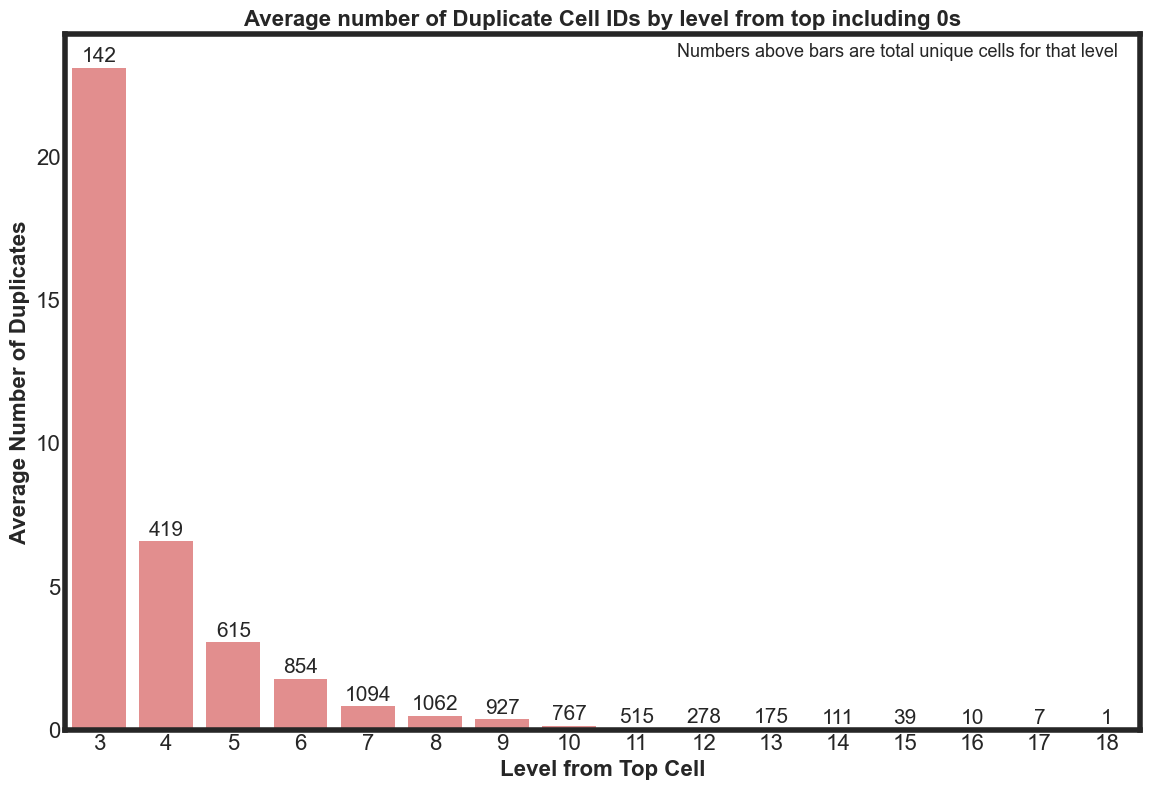

In [169]:
keys = list(duplicates_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = [np.average(duplicates_dict[k]) for k in keys]
stds = [np.std(duplicates_dict[k]) for k in keys]

keys = keys[3:]
vals = vals[3:]
stds = stds[3:]

number_of_values = [len(duplicates_dict[k]) for k in keys]

#print(vals)

plt.figure(figsize=(12, 8))

plots = sns.barplot(x=keys, y=vals,color='lightcoral')#,errorbar = (stds))

# Iterating over the bars one-by-one
x = 0
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  #  plots.annotate(format(bar.get_height(), '.2f'),
    plots.annotate(number_of_values[x],
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    x += 1


#x_coords = [p.get_x() + 0.5 * p.get_width() for p in plots.patches]
#y_coords = [p.get_height() for p in plots.patches]

#plots.errorbar(x=x_coords, y=y_coords, yerr=stds, fmt="none", c="k")

plots.annotate('Numbers above bars are total unique cells for that level', xy=(8.6, 23.5),size=13)

    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Average number of Duplicate Cell IDs by level from top including 0s',fontsize=16)

plt.xlabel('Level from Top Cell',fontsize=16)
plt.ylabel('Average Number of Duplicates',fontsize=16)
    
plt.show()

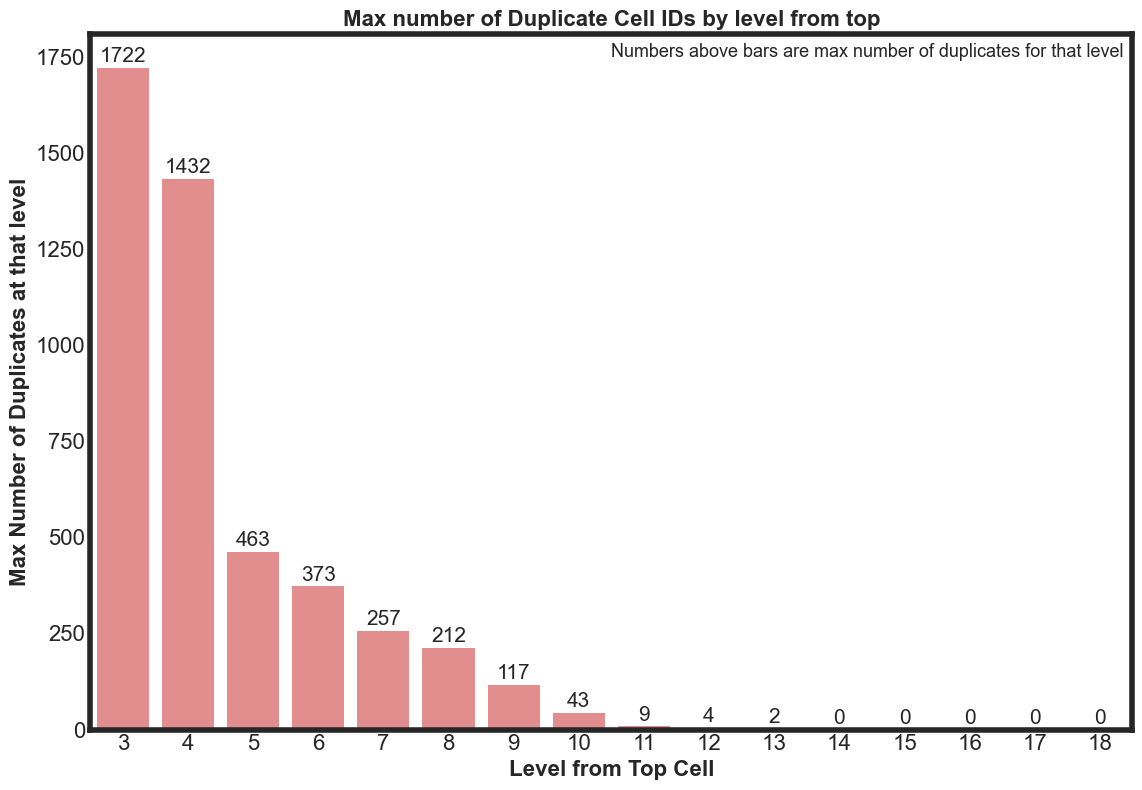

In [168]:
keys_max = list(duplicates_dict.keys())
# get values in the same order as keys, and parse percentage values
vals_max = [np.max(duplicates_dict[k]) for k in keys_max]

keys_max = keys_max[3:]
vals_max = vals_max[3:]

number_of_values_max = [len(duplicates_dict[k]) for k in keys_max]

#print(vals)

plt.figure(figsize=(12, 8))

plots = sns.barplot(x=keys_max, y=vals_max,color='lightcoral')#,errorbar = (stds))

# Iterating over the bars one-by-one
x = 0
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    x += 1


#x_coords = [p.get_x() + 0.5 * p.get_width() for p in plots.patches]
#y_coords = [p.get_height() for p in plots.patches]

#plots.errorbar(x=x_coords, y=y_coords, yerr=stds, fmt="none", c="k")

plots.annotate('Numbers above bars are max number of duplicates for that level', xy=(7.5, 1750),size=13)

    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Max number of Duplicate Cell IDs by level from top',fontsize=16)

plt.xlabel('Level from Top Cell',fontsize=16)
plt.ylabel('Max Number of Duplicates at that level',fontsize=16)
    
plt.show()

In [125]:
duplicates_no_zero_dict = {}

for key, value in tree_dict.items():
    for x in value:
        number = number_of_duplicates(x)
        if number > 0:
            if key not in duplicates_no_zero_dict:
                duplicates_no_zero_dict[key] = [number]
            else:
                duplicates_no_zero_dict[key].append(number)


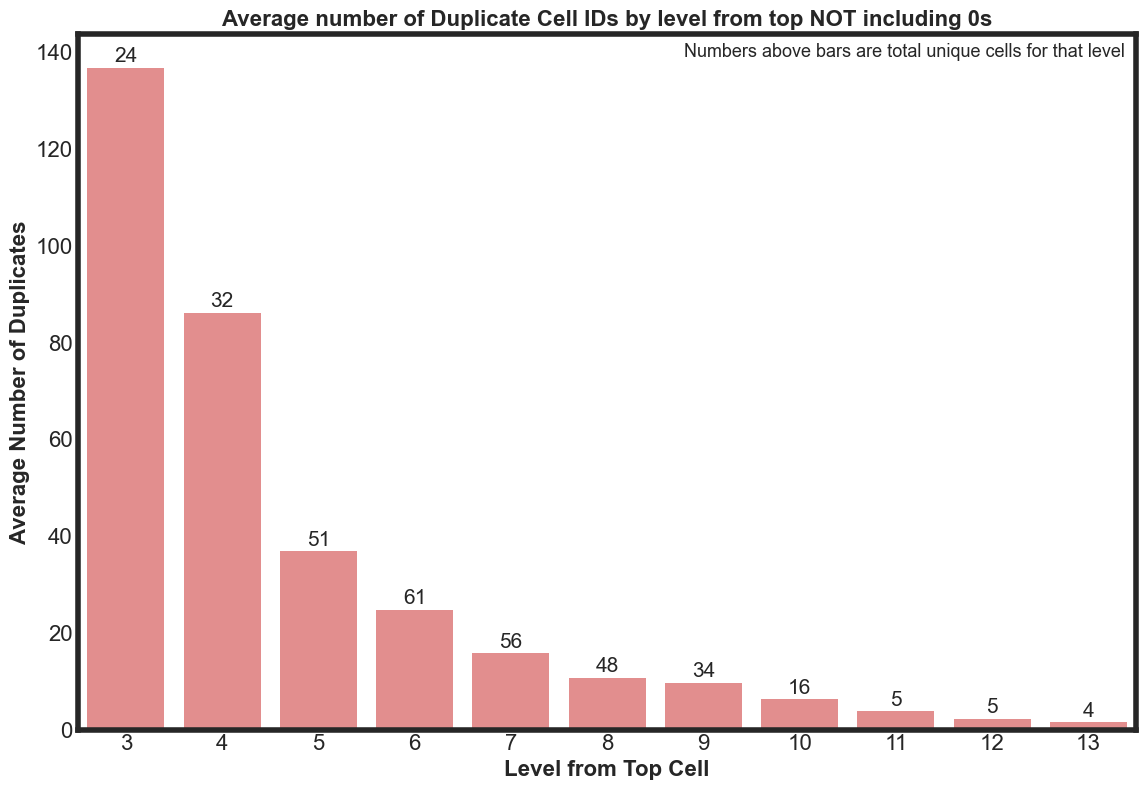

In [162]:
keys_no_zero = list(duplicates_no_zero_dict.keys())
# get values in the same order as keys, and parse percentage values
vals_no_zero = [np.average(duplicates_no_zero_dict[k]) for k in keys_no_zero]
stds_no_zero = [np.std(duplicates_no_zero_dict[k]) for k in keys_no_zero]

keys_no_zero = keys_no_zero[3:]
vals_no_zero = vals_no_zero[3:]
stds_no_zero = stds_no_zero[3:]

number_of_values_no_zero = [len(duplicates_no_zero_dict[k]) for k in keys_no_zero]

#print(vals)

plt.figure(figsize=(12, 8))

plots = sns.barplot(x=keys_no_zero, y=vals_no_zero,color='lightcoral')#,errorbar = (stds))

# Iterating over the bars one-by-one
x = 0
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  #  plots.annotate(format(bar.get_height(), '.2f'),
    plots.annotate(number_of_values_no_zero[x],
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    x += 1


#x_coords = [p.get_x() + 0.5 * p.get_width() for p in plots.patches]
#y_coords = [p.get_height() for p in plots.patches]

#plots.errorbar(x=x_coords, y=y_coords, yerr=stds_no_zero, fmt="none", c="k")

plots.annotate('Numbers above bars are total unique cells for that level', xy=(5.8, 139),size=13)

    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Average number of Duplicate Cell IDs by level from top NOT including 0s',fontsize=16)
plt.xlabel('Level from Top Cell',fontsize=16)
plt.ylabel('Average Number of Duplicates',fontsize=16)
    
plt.show()